In [17]:
import numpy as np
import pandas as pd
from pathlib import Path
try:
    from matplotlib import matplotlib
except:
    %pip install matplotlib


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
if Path("/content").exists():
  %cd /content
  if not Path("cassini-potenziamento-informatica").exists():
    !git clone https://github.com/s2n-cnit/cassini-potenziamento-informatica
  %cd cassini-potenziamento-informatica/2023_04_26

[Errno 2] No such file or directory: '/content'
/Users/alexcarrega/Library/CloudStorage/OneDrive-unige.it/teaching/cassini/2023_05_03/cassini-potenziamento-informatica/2023_04_26
Cloning into 'cassini-potenziamento-informatica'...
remote: Enumerating objects: 482, done.
remote: Counting objects: 100% (482/482), done.
remote: Compressing objects: 100% (368/368), done.
remote: Total 482 (delta 100), reused 475 (delta 100), pack-reused 0
Receiving objects: 100% (482/482), 11.42 MiB | 1.91 MiB/s, done.
Resolving deltas: 100% (100/100), done.
/Users/alexcarrega/Library/CloudStorage/OneDrive-unige.it/teaching/cassini/2023_05_03/cassini-potenziamento-informatica/2023_04_26/cassini-potenziamento-informatica/2023_04_26


In [19]:
df = pd.read_csv("data.csv")
df

,Home,Away,GoalHome,GoalAway
0,Genoa,Padova,1,0
1,Inter,Sampdoria,2,1
2,Milan,Lazio,3,1
3,Roma,Juventus,3,3
4,Lecce,Salernitana,1,1


In [20]:
df["WinHome"] = df.GoalHome > df.GoalAway
df["WinAway"] = df.GoalHome < df.GoalAway
df["Draw"] = df.GoalHome == df.GoalAway

In [21]:
df["PointHome"] = df.WinHome * 3 + df.Draw * 1
df["PointAway"] = df.WinAway * 3 + df.Draw * 1

In [22]:
df

,Home,Away,GoalHome,GoalAway,WinHome,WinAway,Draw,PointHome,PointAway
0,Genoa,Padova,1,0,True,False,False,3,0
1,Inter,Sampdoria,2,1,True,False,False,3,0
2,Milan,Lazio,3,1,True,False,False,3,0
3,Roma,Juventus,3,3,False,False,True,1,1
4,Lecce,Salernitana,1,1,False,False,True,1,1


In [23]:
h = df.groupby(by="Home").sum().PointHome
h

Home
Genoa    3
Inter    3
Lecce    1
Milan    3
Roma     1
Name: PointHome, dtype: int64

In [24]:
a = df.groupby(by="Away").sum().PointAway
a

Away
Juventus       1
Lazio          0
Padova         0
Salernitana    1
Sampdoria      0
Name: PointAway, dtype: int64

In [25]:
ranking = pd.concat([a, h]).groupby(level=0).sum().sort_values(ascending=False)
ranking = pd.DataFrame(ranking, columns=["Points"])
print(ranking)

             Points
Genoa             3
Inter             3
Milan             3
Juventus          1
Lecce             1
Roma              1
Salernitana       1
Lazio             0
Padova            0
Sampdoria         0


In [26]:
# Aggiungere una colonna con la differenza reti al dataframe ranking

df["GoalDiff"] = df.GoalHome - df.GoalAway
h = df.groupby(by="Home").GoalDiff.sum()
a = -df.groupby(by="Away").GoalDiff.sum()
goal_diff = pd.DataFrame(pd.concat([h, a]).groupby(level=0).sum(), columns=["GoalDiff"])
ranking = ranking.join(goal_diff)

In [27]:
ranking

,Points,GoalDiff
Genoa,3,1
Inter,3,1
Milan,3,2
Juventus,1,0
Lecce,1,0
Roma,1,0
Salernitana,1,0
Lazio,0,-2
Padova,0,-1
Sampdoria,0,-1


<Axes: >

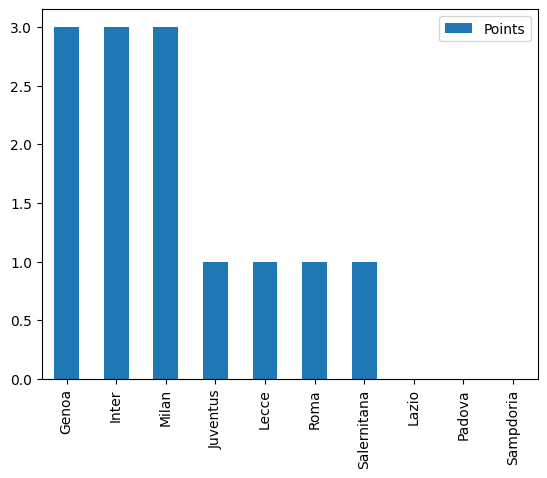

In [28]:
ranking.plot(y="Points", kind="bar")

In [29]:
# Aggiungere 3 colonne a ranking con il numero di vittorie, pareggi e sconfitte